# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

df = pd.read_csv('who.csv')

In [4]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [5]:
df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7235       Zimbabwe
7236       Zimbabwe
7237       Zimbabwe
7238       Zimbabwe
7239       Zimbabwe
Name: country, Length: 7240, dtype: object

In [234]:
#UNIQUE RECORDS
print(df.nunique())


country          219
year              34
new_sp_m014      415
new_sp_m1524    1088
new_sp_m2534    1278
new_sp_m3544    1204
new_sp_m4554    1071
new_sp_m5564     900
new_sp_m65       845
new_sp_f014      451
new_sp_f1524    1022
new_sp_f2534    1085
new_sp_f3544     925
new_sp_f4554     797
new_sp_f5564     663
new_sp_f65       662
new_sn_m014      262
new_sn_m1524     303
new_sn_m2534     342
new_sn_m3544     332
new_sn_m4554     329
new_sn_m5564     302
new_sn_m65       320
new_sn_f014      254
new_sn_f1524     284
new_sn_f2534     304
new_sn_f3544     274
new_sn_f4554     250
new_sn_f5564     237
new_sn_f65       267
new_ep_m014      247
new_ep_m1524     279
new_ep_m2534     306
new_ep_m3544     280
new_ep_m4554     257
new_ep_m5564     217
new_ep_m65       238
new_ep_f014      230
new_ep_f1524     262
new_ep_f2534     300
new_ep_f3544     264
new_ep_f4554     241
new_ep_f5564     207
new_ep_f65       216
newrel_m014      111
newrel_m1524     140
newrel_m2534     146
newrel_m3544 

In [237]:
df[df.duplicated()]       
#No duplicate Rows

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65


In [385]:
null_vals = df.isna().sum().reset_index()
null_vals.columns = ['Factors', 'Missing Values']
null_vals
#Missing values in the new-sp/sn/ep/rel did not remove the records so that I can plot the answers properly


No countries are missing years


In [233]:
print('\nNumber of Countries:', len(df['country'].unique()))
print('\nPeriod: %s - %s'%(min(df['year']), max(df['year'])))


Number of Countries: 219

Period: 1980 - 2013


In [7]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 

In [8]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 7,240
Columns: 58


In [9]:
df.isna().sum().sum()

329394

In [10]:
df['year'].isna().sum()


0

In [13]:
df.isna().sum().value_counts(dropna=False)


6220    4
6219    4
7057    4
7058    3
7056    3
6223    3
0       2
6222    2
7050    2
7055    2
4031    2
6218    2
4043    1
4040    1
4034    1
4036    1
6213    1
6202    1
6214    1
4022    1
4021    1
6195    1
4017    1
6215    1
6221    1
4045    1
4041    1
4067    1
4066    1
6200    1
6210    1
6208    1
6226    1
6216    1
6224    1
4046    1
6225    1
dtype: int64

In [230]:
df.count(1)



0        2
1        2
2        2
3        2
4        2
        ..
7235    40
7236    44
7237    44
7238    44
7239    16
Length: 7240, dtype: int64

#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [367]:
dfLong = (
    df.melt(id_vars=['year','country'],var_name='newage', value_name='number_of_cases')
)

dfLong.head()


,year,country,newage,number_of_cases
0,1980,Afghanistan,new_sp_m014,NaN
1,1981,Afghanistan,new_sp_m014,NaN
2,1982,Afghanistan,new_sp_m014,NaN
3,1983,Afghanistan,new_sp_m014,NaN
4,1984,Afghanistan,new_sp_m014,NaN


In [368]:
#dfLong[['NEW','Gender','Age']]= dfLong['new_age'].str.split('_', n=2, expand= True)
dfLong[['Diagnosis','Gend']]=dfLong['newage'].str.rsplit('_',n=1, expand= True)
dfLong = dfLong.drop(columns=['newage'])
dfLong.head()

,year,country,number_of_cases,Diagnosis,Gend
0,1980,Afghanistan,NaN,new_sp,m014
1,1981,Afghanistan,NaN,new_sp,m014
2,1982,Afghanistan,NaN,new_sp,m014
3,1983,Afghanistan,NaN,new_sp,m014
4,1984,Afghanistan,NaN,new_sp,m014


In [369]:
#dfLong[['Gender','Age']]=dfLong['Gend'].str.split('(\d+)',n=1, expand= True)
#dfLong['Gender','Age'] = dfLong['Gend'].apply(lambda x: int(x.split('(\d+)')[2]))

#dfLong['Gender'] = dfLong['Gend'].str[0]
dfLong['Age'] = dfLong['Gend'].str[1:]
#dfLong['Gender'] = dfLong['Gend'].str.split('(\d+)',n=1, expand= True)
#dfLong = dfLong.drop(columns=['Gend'])
#dfLong['Age'] = dfLong['Gend'].str.rsplit('()',n=1, expand= True)
dfLong.head()


,year,country,number_of_cases,Diagnosis,Gend,Age
0,1980,Afghanistan,NaN,new_sp,m014,014
1,1981,Afghanistan,NaN,new_sp,m014,014
2,1982,Afghanistan,NaN,new_sp,m014,014
3,1983,Afghanistan,NaN,new_sp,m014,014
4,1984,Afghanistan,NaN,new_sp,m014,014


In [370]:
dfLong['Gender'] = dfLong['Gend'].str[0]
dfLong.head()

,year,country,number_of_cases,Diagnosis,Gend,Age,Gender
0,1980,Afghanistan,NaN,new_sp,m014,014,m
1,1981,Afghanistan,NaN,new_sp,m014,014,m
2,1982,Afghanistan,NaN,new_sp,m014,014,m
3,1983,Afghanistan,NaN,new_sp,m014,014,m
4,1984,Afghanistan,NaN,new_sp,m014,014,m


In [371]:
dfLong.drop(['Gend'], axis=1)

,year,country,number_of_cases,Diagnosis,Age,Gender
0,1980,Afghanistan,NaN,new_sp,014,m
1,1981,Afghanistan,NaN,new_sp,014,m
2,1982,Afghanistan,NaN,new_sp,014,m
3,1983,Afghanistan,NaN,new_sp,014,m
4,1984,Afghanistan,NaN,new_sp,014,m
...,...,...,...,...,...,...
405435,2009,Zimbabwe,NaN,newrel,65,f
405436,2010,Zimbabwe,NaN,newrel,65,f
405437,2011,Zimbabwe,NaN,newrel,65,f
405438,2012,Zimbabwe,NaN,newrel,65,f


In [372]:
dfLong.head()

,year,country,number_of_cases,Diagnosis,Gend,Age,Gender
0,1980,Afghanistan,NaN,new_sp,m014,014,m
1,1981,Afghanistan,NaN,new_sp,m014,014,m
2,1982,Afghanistan,NaN,new_sp,m014,014,m
3,1983,Afghanistan,NaN,new_sp,m014,014,m
4,1984,Afghanistan,NaN,new_sp,m014,014,m


In [373]:
dfLong.tail()

,year,country,number_of_cases,Diagnosis,Gend,Age,Gender
405435,2009,Zimbabwe,NaN,newrel,f65,65,f
405436,2010,Zimbabwe,NaN,newrel,f65,65,f
405437,2011,Zimbabwe,NaN,newrel,f65,65,f
405438,2012,Zimbabwe,NaN,newrel,f65,65,f
405439,2013,Zimbabwe,725.0,newrel,f65,65,f


In [374]:
#ages = pd.DataFrame(dfLong['Age'])

#bins = [0, 15, 25, 35, 45, 55, 65]
#labels = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64','65+']
#ages['agerange'] = pd.cut(ages.Age, bins, labels = labels,include_lowest = True)


AgeGroup = {'014': '0-14', '1524': '15-24', '2534': '25-34', '3544':'35-44', '4554':'45-54','5564':'55-64','65':'65+'}
dfLong['Age'] = dfLong['Age'].map(AgeGroup)
dfLong.head()

,year,country,number_of_cases,Diagnosis,Gend,Age,Gender
0,1980,Afghanistan,NaN,new_sp,m014,0-14,m
1,1981,Afghanistan,NaN,new_sp,m014,0-14,m
2,1982,Afghanistan,NaN,new_sp,m014,0-14,m
3,1983,Afghanistan,NaN,new_sp,m014,0-14,m
4,1984,Afghanistan,NaN,new_sp,m014,0-14,m


#### Question 3: Create a graph that shows when countries started to report TB cases.

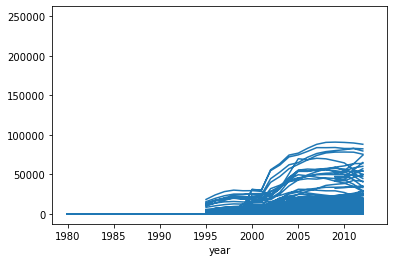

In [376]:
(
    dfLong.plot(x='year', y='number_of_cases', kind='line', legend=False)
)
plt.show()

#plt.xlabel('year')
#plt.ylabel('Cases')
#plt.legend(title='')
#plt.show()

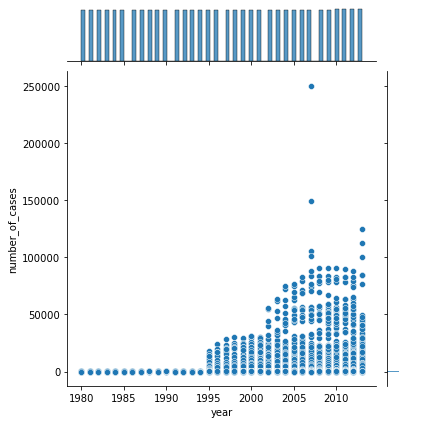

In [377]:
sns.jointplot(x='year',y='number_of_cases',data=dfLong)

In [378]:

#Copied from Project Life Expectancy WHO.


c = ['country', 'Gender','Diagnosis']
n = [] 
for i in dfLong.columns:
    if i != 'country' and dfLong[i].dtype in (np.float64, np.int64):
        numeric_cols.append(i)

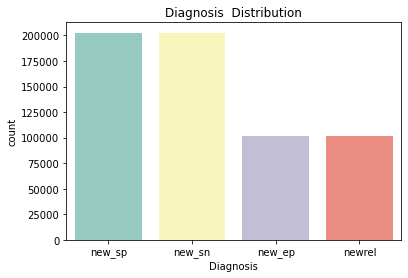

In [379]:
plt.rcParams.update({'figure.max_open_warning': 0})
for col in c:                                             
    sns.countplot(x=col, data=dfLong, dodge=True, palette="Set3")
    plt.title('%s  Distribution'%col)
plt.show()
for i,col in enumerate(n, 1): 
    sns.displot(x=dfLong[col])
    plt.title('%s  Distribution'%col)
plt.show()

<AxesSubplot:xlabel='country'>

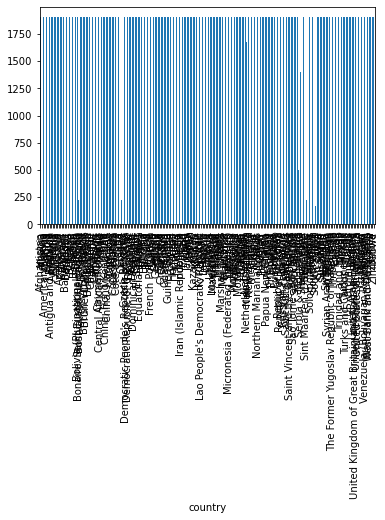

In [384]:
dfLong.groupby(['country']).size().plot(kind = "bar")

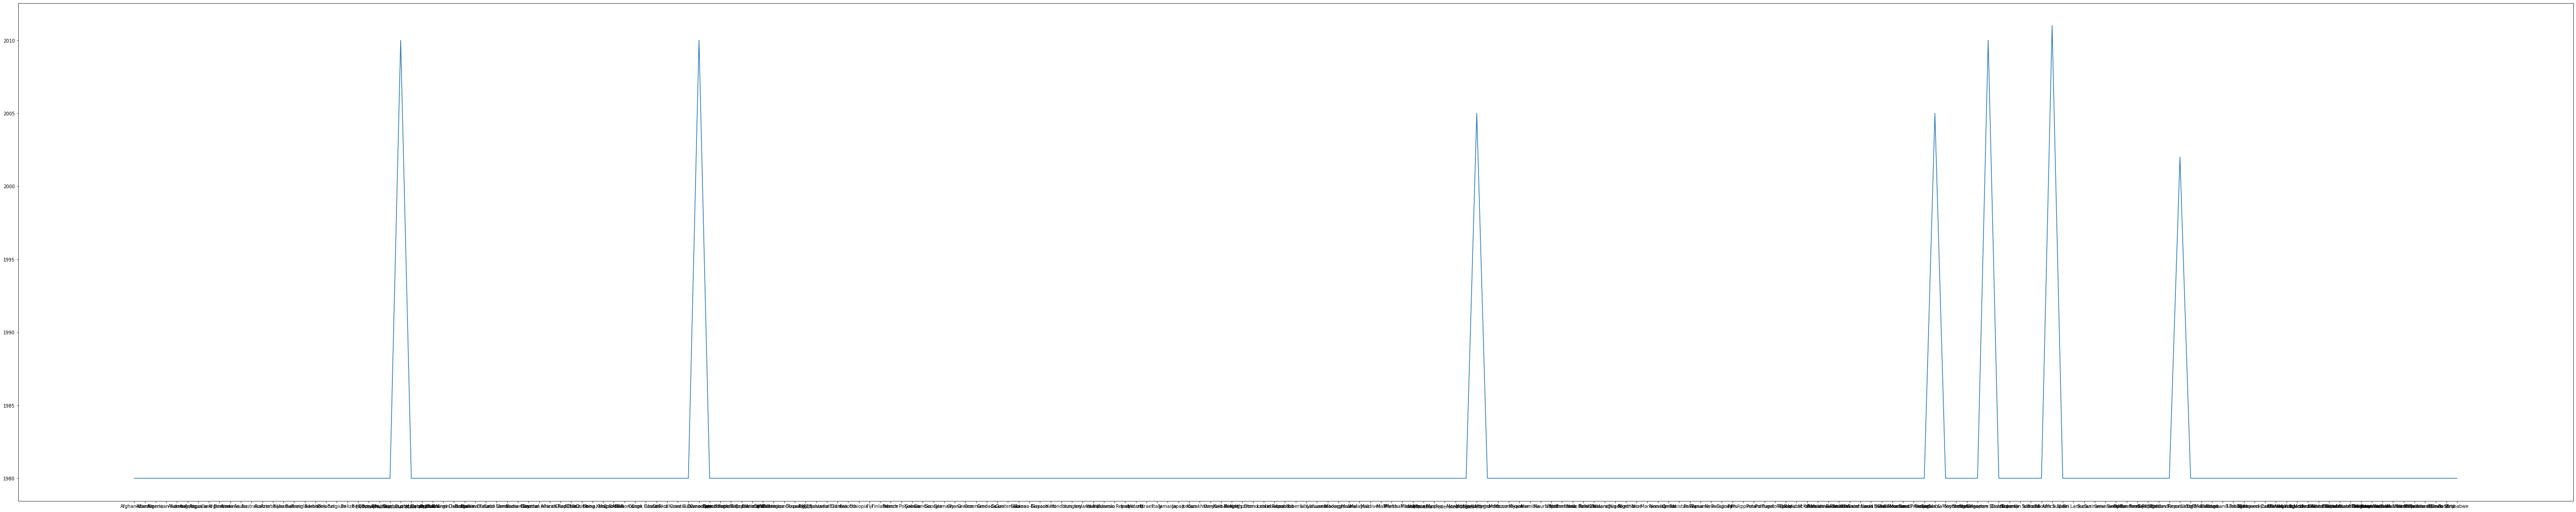

In [382]:
plott= dfLong.iloc[:,0:2]
r=plott.groupby('country')
q= r.first()
plt.figure(figsize=(100,20))
plt.plot(q)
plt.title('')
plt.show()
